In [68]:
# import necessary library
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")


PostgreSQL supports the following data types:
* Boolean
* Chracter Types : char, varchar and text
* Numeric Types: integer and floating point number
* Temporal types: date, time, timestamp, timestampz interval
* UUID : Universally Unique Identifiers
* Array: for storing array string, numbers
* JSON: stores JSON data
* hstore: key-value pair
* special data types related to geometric and network.
    * box - a rectangular box
    * line -  a set of points
    * point -  a geometric pair of numbers
    * lseg- a line segment
    * polygon -  a closed geometric
    * inet - an IP4 address
    * macaddr -  a MAC address

### **DataTypes in Detail:**

#### Boolean:
1. PostgreSQL supports Boolean data type.
2. It can have three values: true, false and NULL.
3. It uses one byte for storing a boolean value in the database.

Valid literal values for TRUE:
true, 't', 'true,'y','yes', '1'

Valid literals for FALSE:
false, 'f','false','n','no','0

#### PostgreSQL chracter types:
1. CHRACTER VARYING(n) or VARCHAR(n): variable length with length limit
2. CHRACTER(n) or CHAR(n): fixed length, blank padded
3. TEXT or VARCHAR: variable unlimited length

Diffrent from other database systems, There is no performance diffrance among three chracter types

Therefore, should use TEXT or VARCHAR. Use the VARCHAR(n) when you want postgreSQL to check for length.

#### NUMERIC data type:
- used to store numbers with lots of digits.
PostgreSQL provides two distinct types of numbers:
* floating-point numbers
* integers

There are three main types of floating-point numbers:
* float(n): floating-point number whose precision, at least, n, up to a maximum of 8 bytes
* real or float8: 4-byte floating point number
* numeric or numeric(p,s): real number with p digits with s number after the decimal point.

Syntex for NUMERIC data type:

**NUMERIC(precision, scale)**

   * precision- total number of digits
   * scale - number of digits in fraction part

If precision is not required, NUMERIC type should not be used because calculations on NUMERIC values are typicall slower than integer, floats and double precisions

##### Diffrence between Float and Numeric:

Float uses the FPU (floating point unit) of the CPU. 

This has a couple of implications: 
Float follows the IEEE 754 statndard, which also implies that the rounding rules defined by the standard are followed.

This is totally fine for some of the data set. However, it is not suitable for handling money.

In case of money, diffrent rounding rules are needed, which is why numeric is the data type we use to handle financial data.

Example to demonstrate the above concept:

In [2]:
query = """SELECT a, b, c,
            a + b,
            a + b = c
        FROM (
        SELECT 0.1::float8 a, 0.2::float8 b, 0.3::float8 c) AS t;"""

sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,a,b,c,?column?,?column?
0,0.1,0.2,0.3,0.3,False


In [ ]:
query = """SELECT a, b, c,
            a + b,
            a + b = c
        FROM (
        SELECT 0.1::numeric a, 0.2::numeric b, 0.3::numeric c
) AS t;"""

sqlio.read_sql_query(query,conn)

#### Integer Data type
* used to store whole numbers in PostgreSQL
We have follwing data types available:
1. SMALLINT
2. INTEGER
3. BIGINT

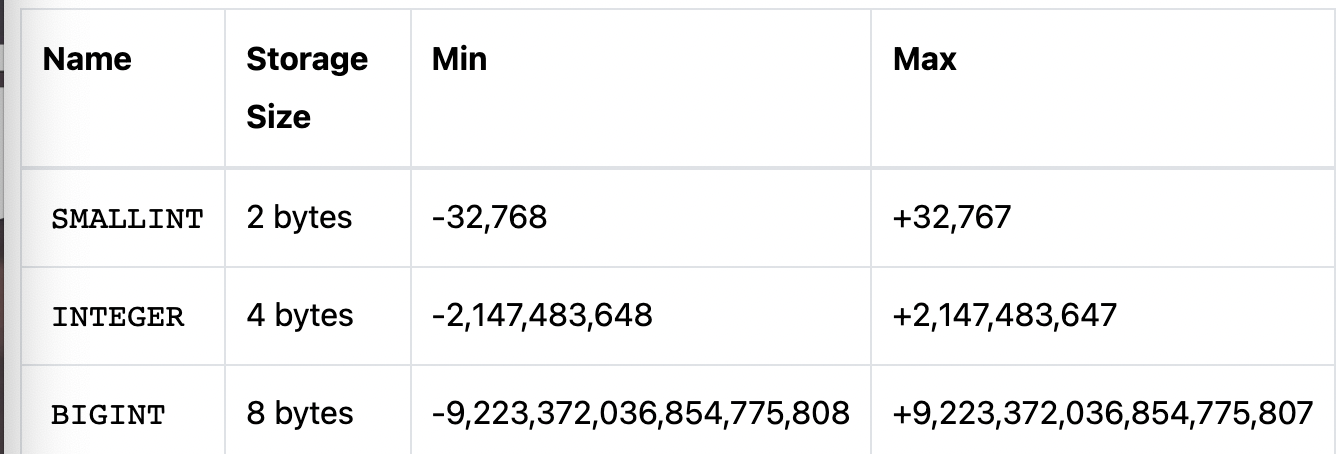

PostgreSQL does not provide unsigned integer types.

#### Temporal Types:
1. DATE
2. TIME
3. TIMESTAMP
4. TIMESTAMPZ
5. INTERVAL

DATE data type:
* stores the date values
* takes 4 bytes of storage
* range is from 4713 BC to 5874897 AD.
* PostgreSQL uses the yyyy-mm-dd format for storing and inserting date values.

Syntex:

Column_name DATE [Default CURRENT_DATE]

Functions of PostgreSQL DATE format:

In [2]:
#1. NOW()
query = """select now();"""
sqlio.read_sql_query(query,conn)

,now
0,2022-02-24 12:13:53.034979+00:00


The output of the above query will be TIMESTAMP.

In [ ]:
#To extract date part of the NOW()
query = """SELECT NOW()::date;"""
sqlio.read_sql_query(query,conn)

In [4]:
#To print current date()
query = """SELECT CURRENT_DATE;"""
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,current_date
0,2022-02-22


TO_CHAR():
* convert the default format value of date present in yyyy-mm-dd to another format

Syntex:
TO_CHAR(datetobeConverted, targetTemplate_

In [5]:
# example
query = """SELECT TO_CHAR(CURRENT_DATE, 'Day, dd yyyy');"""
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,to_char
0,"Tuesday , 22 2022"


In [39]:
# example
query = """SELECT TO_CHAR(CURRENT_DATE, 'mm/dd/yyyy');"""
sqlio.read_sql_query(query,conn)

,to_char
0,02/24/2022


In [40]:
# example
query = """SELECT TO_CHAR(CURRENT_DATE, 'Day, DD');"""
sqlio.read_sql_query(query,conn)

,to_char
0,"Thursday , 24"


#### Diffrance between two dates
* (-) minus operator can be used to subtract two dates.
* result is in days

In [41]:
# example
query = """SELECT CURRENT_DATE-'2021-02-01';"""
sqlio.read_sql_query(query,conn)

,?column?
0,388


##### example -- ignore
query = """SELECT CURRENT_DATE-'2021-02-01';"""
cur.execute(query)
query_results = cur.fetchall()
print(query_results)

#### Find out the age

In [30]:
# example
query = """SELECT AGE(DATE('1947-01-26'));"""
sqlio.read_sql_query(query,conn)

,age
0,27404 days


In [29]:
# example
query = """SELECT AGE('2022-06-01','1996-01-26');"""
sqlio.read_sql_query(query,conn)

,age
0,9616 days


TIME:
* stores the time of day values
* requires 8 bytes of storage
* can have precison up to 6 digits
* can range from 00:00:00 to 24:00:00

**Syntex:**

column_name TIME(precision);

* column: name of the column having data type as TIME
* precision: fractional digits number placed in the seconds' field

#### Common TIME formats are: <br>
**(without precision):** <br>
HH:MM ex. 09:10<br>
HH:MM:SS ex. 09:10:45 <br>
HHMMSS ex. 091045

**With precision:** <br>
MM:SS.pppppp 04:59.999999 <br>
HH:MM:SS.pppppp 04:05:06.777777<br>
HHMMSS.pppppp 040506.777777

Get the current time

In [6]:
query = """SELECT CURRENT_TIME;"""
sqlio.read_sql_query(query,conn)

,current_time
0,17:43:53.034979+05:30


In [5]:
query = """SELECT CURRENT_TIME(6);"""
sqlio.read_sql_query(query,conn)

,current_time
0,17:43:53.034979+05:30


#### Extract fields like seconds, minutes and hours
* EXTRACT function

Syntex: <br>
EXTRACT(extract_field FROM time);

In [4]:
# extract hour from current_time
query = """SELECT CURRENT_TIME,
           EXTRACT(HOUR FROM CURRENT_TIME);"""
sqlio.read_sql_query(query,conn)

,current_time,extract
0,17:43:53.034979+05:30,17.0


In [3]:
query = """SELECT CURRENT_TIME,
           EXTRACT(MINUTE FROM CURRENT_TIME);"""
sqlio.read_sql_query(query,conn)

,current_time,extract
0,17:43:53.034979+05:30,43.0


#### Convert the time from one time zone to another time zone

Syntex:

[time_zone TIME] AT TIME ZONE time_zone

In [31]:
# Convert the CURRENT_TIME to the time zone GMT+2
query = """SELECT CURRENT_TIME AT TIME ZONE 'GMT+2';"""
sqlio.read_sql_query(query,conn)

,timezone
0,12:47:35.216207-02:00


Arithmetic Operations on time values.

In [8]:
# Addition - current time is incremented 3 hpurs
query = """SELECT CURRENT_TIME + interval '3 hours';"""
sqlio.read_sql_query(query,conn)

,?column?
0,20:43:53.034979+05:30


In [7]:
# Subtraction
query = """SELECT
           time '11:00' - time '03:00';"""
sqlio.read_sql_query(query,conn)


,?column?
0,0 days 08:00:00


PostgreSQL provides two tempoaral data types for handling timestamp.
    1) TIMESTAMP
    2) TIMESTAMPZ

TIMESTAMP:
* timestamp allows us to store both data and time format.
* storage size is 8 bytes 
* If the time zone of the server changed, it will not affect the actual data that we have stored into the database.

Functions of timestamp datatype:
1. Now()
2. Current_timestamp
3. Timeofday()

In [ ]:
# Now() function gives the current date and time
query = """SELECT NOW();"""
sqlio.read_sql_query(query,conn)


In [9]:
# time of day function: gives day, date and time 
    #format with timezone
query = """select timeofday();"""
sqlio.read_sql_query(query,conn)

,timeofday
0,Thu Feb 24 17:44:33.448074 2022 IST


In [10]:
# Current timestamp: gives current date and time 
# with current Timestamp
query = """select Current_timestamp;"""
sqlio.read_sql_query(query,conn)

,current_timestamp
0,2022-02-24 12:13:53.034979+00:00


**Timestamptz:** 

**Timestampz** datatype is a time zone-aware data and time data typestamp. 

PostgreSQL stores the timestampz in UTC value.
* UTC stands for Universal Time Coordinated. It is a successor of Greenwich Mean Time (GMT)

In [11]:
query = """SHOW Timezone;"""
sqlio.read_sql_query(query,conn)

,TimeZone
0,Asia/Kolkata


In [ ]:
# Current timestamp: gives current date and time 
# with current Timestamp
query = """select Current_timestamp;"""
sqlio.read_sql_query(query,conn)

##### Convert between timezones
function: timezone(zone,timestamp);

In [32]:
query = """select timezone('America/New_York',now());"""
sqlio.read_sql_query(query,conn)

,timezone
0,2022-02-24 09:47:35.216207


**Interval:**
* stores period of time
* holds 16 bytes of space and ranging from -178000000 years to 178000000 years.

Syntex:
interval [Data_fields][(p)]

* Data_fields: Time period
* p: precision

In [33]:
query = """SELECT now(),
            now()-INTERVAL '2 year 4 hours 25 minutes'"""

sqlio.read_sql_query(query,conn)

,now,?column?
0,2022-02-24 14:47:35.216207+00:00,2020-02-24 10:22:35.216207+00:00


In [13]:
query = """SELECT now(),
            now()-INTERVAL '2 year 4 hours 25 minutes'
            AS "2 year 4 hours 25 mins ago"
            """
sqlio.read_sql_query(query,conn)

,now,2 year 4 hours 25 mins ago
0,2022-02-24 12:13:53.034979+00:00,2020-02-24 07:48:53.034979+00:00


PostgreSQL stores the interval type value in the integer form of days and months
for values in seconds, it can be fractions

In [14]:
query = """SELECT now(),
            now()- INTERVAL '6 seconds'
            """
sqlio.read_sql_query(query,conn)

,now,?column?
0,2022-02-24 12:13:53.034979+00:00,2022-02-24 12:13:47.034979+00:00


UUID:
- stands for Universal Unique Indentifier defined by RFC 4122.
- It is a 128-bit quantity generated by an algo that make it unique in the known universe using the same algorithm.
- UUID is used in the distributed systems because it guarntees a better uniqueness than the SERIAL data type which generates only unique values within a single database.

To use UUID data type in PostgreSQL, we have to install third party module **uuid-ossp"**.

PostgreSQL enables us to store and compare UUID values in its core.
However, to generate UUID, it depends on the third party modules.

In [15]:
# install the "uuid-ossp" extension
CREATE EXTENSION IF NOT EXISTS "uuid-ossp";

SyntaxError: invalid syntax (1945483413.py, line 2)

For example: generate UUID values based on the combination of computer's MAC address, present timestamp and a random value

In [16]:
query = """SELECT uuid_generate_v4();
            """
sqlio.read_sql_query(query,conn)

,uuid_generate_v4
0,76c9e01c-cf72-4539-ae7a-2b1ce64ee2ea


For more information on PostgreSQl UUID, visit,
https://www.postgresql.org/docs/10/uuid-ossp.html

#### Example - a column having datatype uuid
CREATE TABLE contacts ( <br>
    contact_id uuid DEFAULT uuid_generate_v4 (), <br>
    first_name VARCHAR NOT NULL); <br>
    
INSERT INTO contacts ( <br>
    first_name ) <br>
VALUES <br>
    ( 'ABC');
    

#### JSON:
- stands for JAVA script notation.
- it is an open standard format that consists of key-value pairs.
- main use of JSON is to transport data between a server and a web application.


Syntex: 

variable_name json;

#### Example: 
CREATE TABLE restaurent_orders (
    ID serial NOT NULL PRIMARY KEY,
    info json NOT NULL
);

INSERT INTO restaurent_orders(info)
VALUES
    (
        '{ "customer": "Shaheed Kapoor", "items": {"product": "coffee", "qty": 6}}'
    );

hstore:
* It implements the hstore data type for storing key-value pairs in a single value.
* It considers the key-value pair as a single entity.
* used in cases where column's value does not fit into relational column.
* similar to dictionary used in programming languages.

#### Syntex:

column_name hstore

To use hstore datatype in PostgreSQL, we have to enable hstore extension.

command to enable hstore extn:
CREATE EXTENSION hstore;


Example:
#### Create table
    CREATE TABLE bank_employee (
        id serial primary key,
        name VARCHAR (255),
        data hstore
        );

#### Insert data:
INSERT INTO bank_employee(name, data)
    VALUES
    (
    'Anthony',
    '"contact_number" => "9912002430",
    "salary" => "30000",'
    );

In [57]:
query = """SELECT *
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,id,name,data
0,1,Anthony,"""Hobby""=>""Indoor Activity"", ""salary""=>""50000"", ""contact_number""=>""9912002430"""


In [58]:
query = """SELECT data
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,data
0,"""Hobby""=>""Indoor Activity"", ""salary""=>""50000"", ""contact_number""=>""9912002430"""


#### Retrieve data from a specific key of hstore
* done using arrow(->) operator

In [61]:
query = """SELECT data -> 'salary'
AS salary
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,salary
0,50000


#### Where clause with key-value

In [63]:
query = """ SELECT name, data -> 'contact_number' AS Contact
            FROM bank_employee 
            WHERE data -> 'salary' = '50000'; """
sqlio.read_sql_query(query,conn)

,name,contact
0,Anthony,9912002430


#### Update the key-value pair

In [64]:
query = """UPDATE bank_employee 
           SET data = data||hstore('RollNo', '1234567')
           where id = 1;
            """
sqlio.read_sql_query(query,conn)

TypeError: 'NoneType' object is not iterable

#### Delete the key-value pair

In [ ]:
query = """ UPDATE bank_employee
            SET data = delete(data, 'job_type')
"""
sqlio.read_sql_query(query,conn)

#### Fetch all keys stored in hstore datatype column:
In order to fetch all keys stored in hstore type column, use the keys() function or skey() function.

In [69]:
# gives result as a list
query = """ SELECT akeys (data) FROM
            bank_employee; """
sqlio.read_sql_query(query,conn)

,akeys
0,"[Hobby, RollNo, salary, contact_number]"


* skey() function is used to fetch the result as a set.

In [70]:
query = """ SELECT skeys (data) FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,skeys
0,Hobby
1,RollNo
2,salary
3,contact_number


#### Fetch all values from the data column

avals() function or svals() is used to fetch all values from the data column.

In [71]:
# result is in the form of List
query = """ SELECT avals(data)
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,avals
0,"[Indoor Activity, 1234567, 50000, 9912002430]"


In [72]:
query = """ SELECT svals(data)
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,svals
0,Indoor Activity
1,1234567
2,50000
3,9912002430


#### Convert hstore data to JSON data

In [73]:
query = """ select name, hstore_to_json (data) as json_data
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,name,json_data
0,Anthony,"{'Hobby': 'Indoor Activity', 'RollNo': '1234567', 'salary': '50000', 'contact_number': '9912002430'}"


alter table bank_employee alter column
data type json using hstore_to_json(data)

#### Convert hstore data to sets

In [74]:
query = """ SELECT name, (EACH(data)).*
            FROM
            bank_employee;"""
sqlio.read_sql_query(query,conn)

,name,key,value
0,Anthony,Hobby,Indoor Activity
1,Anthony,RollNo,1234567
2,Anthony,salary,50000
3,Anthony,contact_number,9912002430


JSON vs hstore and situtions in which one is preferred over another.
Homework?

#### Array:

* Array plays an important role in PostgreSQL.
* All datatype has its own companion array type.
e.g. integer has an integer[] array type,
     chracter has chracter[] array type.

##### Create a table

CREATE TABLE contacts (
    id serial PRIMARY KEY,
    name VARCHAR (100),
    phones TEXT []
);

##### Insert some values
INSERT INTO contacts (name, phones)
VALUES
    (
        'Raju Kumar',
        '{"(408)-589-5841"}'
    ),
    (
        'Nikhil Aggarwal',
        '{"(408)-589-5841"}'
    ),
    (
        'Anshul Aggarwal',
        '{"(408)-589-5841"}'
    ),
    (
        'Puja Singh',
        '{"(408)-589-5842", "(408)-589-58423"}'
    );

In [75]:
query = """ SELECT *
            FROM
            contacts;"""
sqlio.read_sql_query(query,conn)

,id,name,phones
0,2,Nikhil Aggarwal,[(408)-589-5841]
1,3,Anshul Aggarwal,[(408)-589-5841]
2,4,Puja Singh,"[(408)-589-5842, (408)-589-58423]"
3,1,Raju Kumar,"[(408)-589-5841, {""(202)-5555-444"",""(105)-777-5555""}]"


In [76]:
query = """Select name, phones[2] 
            from contacts;"""
sqlio.read_sql_query(query,conn)

,name,phones
0,Nikhil Aggarwal,None
1,Anshul Aggarwal,None
2,Puja Singh,(408)-589-58423
3,Raju Kumar,"{""(202)-5555-444"",""(105)-777-5555""}"


In [77]:
query = """Select name 
            from contacts
            where phones[2]='(408)-589-58423';"""
sqlio.read_sql_query(query,conn)

,name
0,Puja Singh


Write a query to know the owner of the phone number (408)-589-5842

In [78]:
query = """SELECT name, phones
           FROM
           contacts
           WHERE '(408)-589-5842'=ANY(phones)"""
sqlio.read_sql_query(query,conn)

,name,phones
0,Puja Singh,"[(408)-589-5842, (408)-589-58423]"


Update phone number

update contacts set phones[2] = '{"(202)-5555-444","(105)-777-5555"}'
where  name='Raju Kumar';

#### User- Defined Datatypes:

PostgreSQL allows to create user-defined data types through the following statements:
* CREATE DOMAIN:
   * a domain is a data type with optional constraints e.g. NOT NULL and CHECK.

Example - Create a domain for checking if the day is Sunday or not.

CREATE DOMAIN dom_sunday AS date
CONSTRAINT check_sunday CHECK(trim(to_char(VALUE,'day'))='sunday');

CREATE DOMAIN dom_weekday AS date 
CONSTRAINT check_weekday
CHECK (trim(to_char(VALUE,'day')) in ('monday','tuesday'));

Create table create_domain_demo(
    id text,
    myfreeday  dom_sunday,
	myworkday	dom_weekday
);

select * from create_domain_demo;

INSERT INTO create_domain_demo(id, myfreeday, myworkday) 
values(1,'2022-02-20','2022-02-21');

INSERT INTO create_domain_demo(id, myfreeday, myworkday) 
values(1,'2022-02-21','2022-02-22');

Useful for abstracting common constraints on fields into a single location for maintenance.
For ex. A db can contain email address column in multiple tables. They all might require same CHECK constraints to verify rhe address syntex.

** Define a domain rather than setting up each table's constraint indiviually.

**Syntex:**
![image.png](attachment:image.png)

* CREATE TYPE:
    * used to create a composite typpe, which can be used as the return type of a function.

-- Step 1

CREATE TYPE domain_summary AS (
	id TEXT, 
	myfreeday DATE, 
	myworkday DATE
);

-- Step 2:

CREATE OR REPLACE FUNCTION get_domain_summary(f_id text)
RETURNS domain_summary AS
$$
SELECT id, myfreeday, myworkday
from create_domain_demo
where id = f_id;
$$
LANGUAGE SQL;

SELECT * from get_domain_summary(1);

SELECT * from get_domain_summary('1');

#### Sequence data type:
* used to generate unique number identifiers in the database.
* It is a user-defined schema-bound object that generates a sequence of integers based on specified specification.

Syntex:
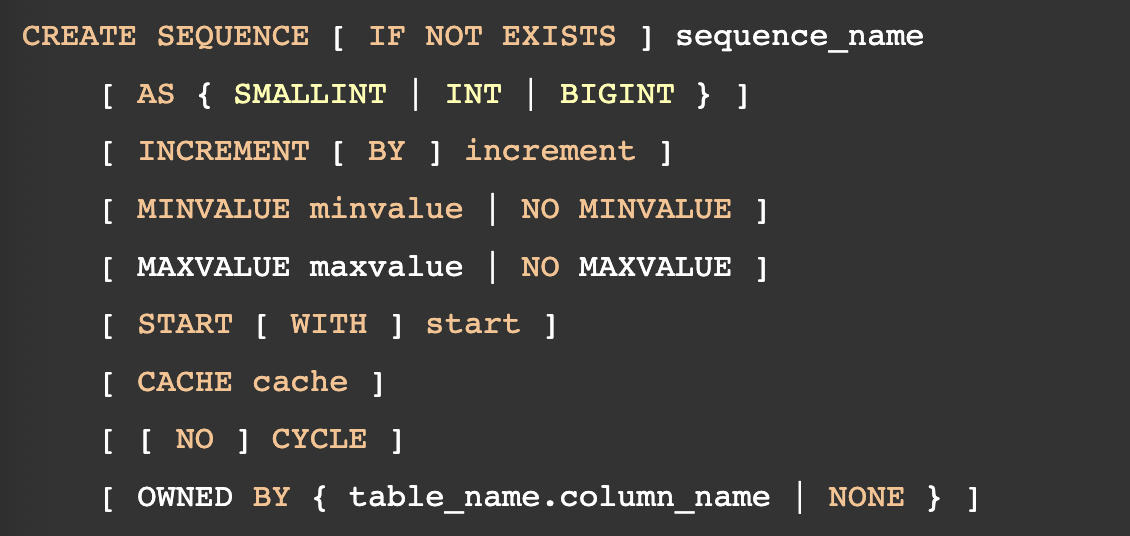  

sequence_name: name of the sequence

IF NOT EXISTS conditionally creates a new sequence only if it does not exist.

[AS{SMALLINT | INT | BIGINT }] - datatype of the sequence. Default datatype is BIGINT if you skip it.

[INCREMENT [BY] increment]: specifies which value to be added to the current sequence value to create a new value. Default value: 1.

[MINVALUE minvalue | NO MINVALUE] and [MAXVALUE maxvalue | NO MAXVALUE]
define the min value and max value of the sequence. IF you use NO MINVALUE and NO MAXVALUE, the sequence will use the default value.
Ascending sequence: default maximum value of the data type of the sequence and the default minimum value is 1.
Descending sequence: the default maximum value is -1 and the default minimum value is the minimum value of the data type of the sequence.

[START [WITH] start]:
- specifies the starting value of the sequence
- default starting value is minvalue for ascending sequences and maxvalue for descending ones.

Cache:
- determines how many sequence numbers are preallocated and stored in memory for faster access.
By default, the sequence generates one value at a time i.e. no cache

CYCLE/ NO CYCLE: 
restart the value if the limit is reached.
No CYCLE: When the limit is reached, attempting to get the next value will result in an error.
DEFAULT: NO CYCLE

OWNED BY table_name.column_name
allows you to associate the table column with the sequence - when you drop the column or table, PostgreSQL will automatically drop the associated sequence.

CREATE SEQUENCE mysequence
INCREMENT 5
START 100;

SELECT nextval('mysequence');

SELECT nextval('mysequence');

SELECT nextval('mysequence');

#### List all sequences in a database

In [79]:
query = """SELECT relname sequence_name
           FROM pg_class 
           WHERE relkind = 'S';"""
sqlio.read_sql_query(query,conn)

,sequence_name
0,distinct_demo_id_seq
1,customer_customer_id_seq
2,actor_actor_id_seq
3,category_category_id_seq
4,film_film_id_seq
5,address_address_id_seq
6,city_city_id_seq
7,country_country_id_seq
8,inventory_inventory_id_seq
9,language_language_id_seq


#### Delete a sequence

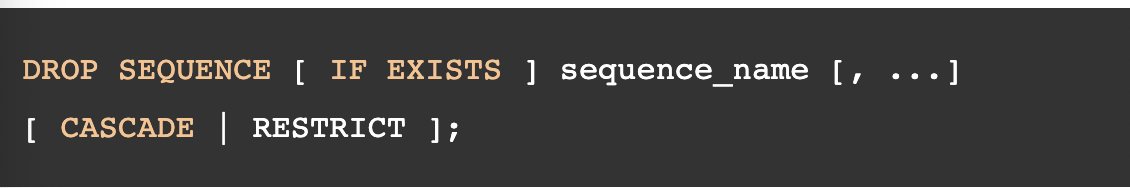

* Use the CASCADE option if you want to recursively drops objects that depend on the sequence.

What happens if you delete a sequence of an an existing table. (if you don't use CASCADE option.)

Create a table and use sequence as one of the column

CREATE TABLE sequence_demo (
	id INT default NEXTVAL('mysequence'),
	bcolor varchar NULL,
	CONSTRAINT sequence_demo_pkey PRIMARY KEY (id)
);

select * from sequence_demo;

insert into sequence_demo(bcolor)
values ('green');

insert into sequence_demo(bcolor)
values ('Red');


If you drop a table, then sequence associated with the table is automatically dropped.

**SERIAL Data Type:**

* used to automatically generate unique integer numbers.

When you define a SERIAL column, PostgreSQL automatically changes column to NOT NULL, creates a sequence **table_serialcol_seq** and DEFAULT NEXTVAL to select ID 

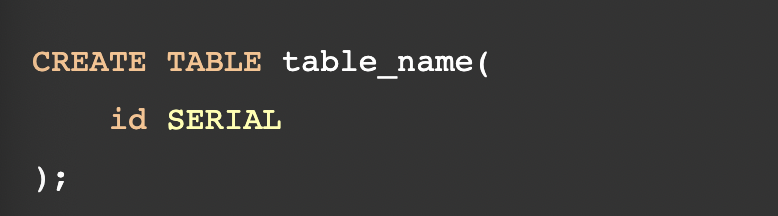

is equivalent to

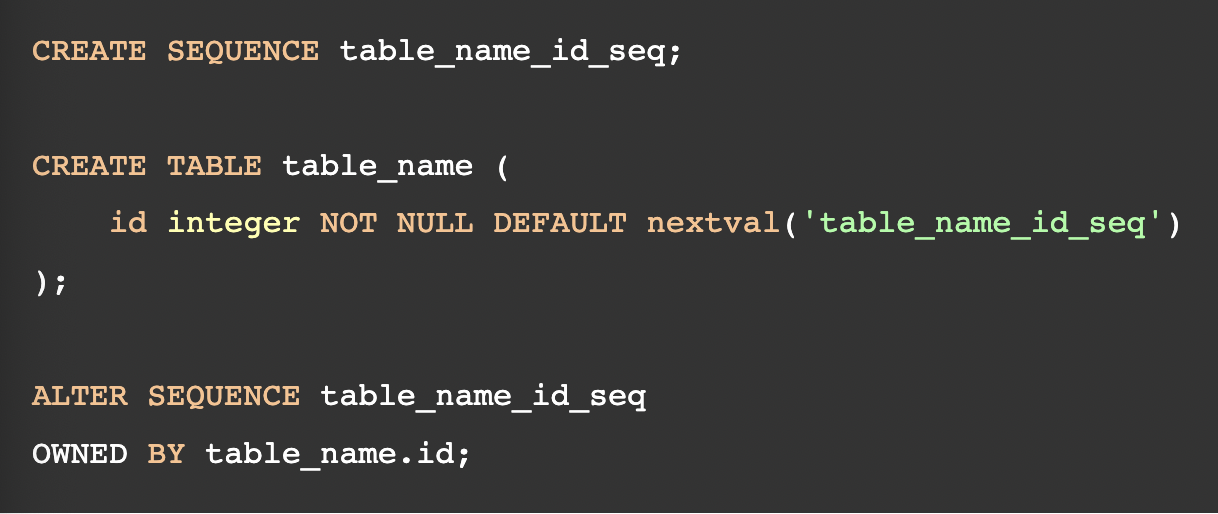

PostgreSQL provides three serial pseudo-types: SMALLSERIAL, SERIAL, and BIGSERIAL

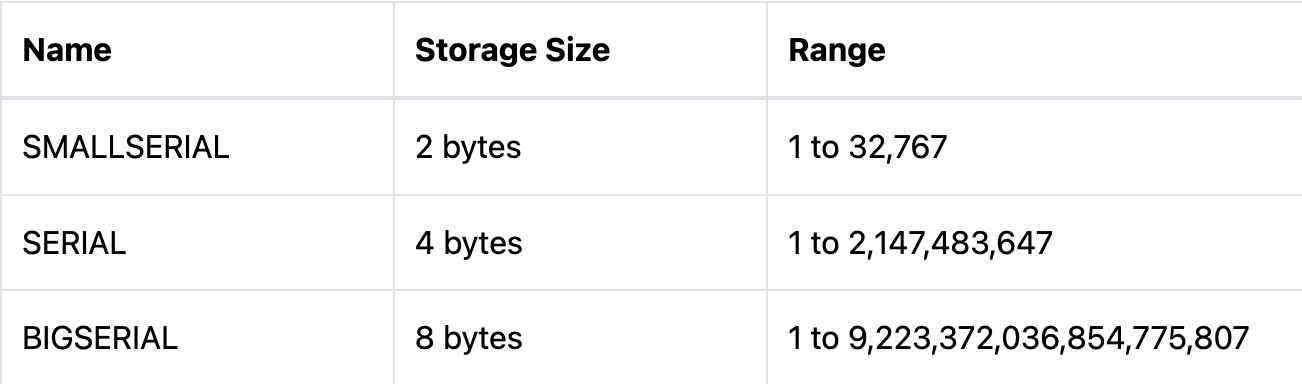

* SERIAL does not implicitly create an index on the column or make the column as the primary key column.

Example to make a column of datatype SERIAL as Primary key.

CREATE TABLE fruits( <br>
    id SERIAL PRIMARY KEY, <br>
    name VARCHAR NOT NULL<br>
    );

#### Important: <br>
The sequence generation operation is not transaction-safe.
If two concurrent database connections attempt to get the next value from a sequence, each client will get a different value.
If one client rolls back the transaction, the sequence number of that client will be unused, creating a gap in the sequence.

Serial is called psuedo data type. Why?